<a href="https://colab.research.google.com/github/hamiq/sars_inhibitor_prediction/blob/main/4_Model_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Building a Regression Model with Random Forest**

Here, a a regression model of SARS coronavirus 3C-like proteinase inhibitors will be built using the Random Forest algorithm.

In general, the goal of this model will be to predict the pIC50 of a given molecule in the input data, a value proportional to the amount of that molecule required to inhibit half of the target protein, based on the molecule's and the 3CL proteinase's physicochemical properties.

---

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('bioactivity_pIC50_pubchem_fp.csv')

## **Feature selection**

### **Input features**

In [ ]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
129,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
130,1,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
131,1,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### **Output features**

In [ ]:
Y = df.pIC50
Y

0      5.142668
1      5.026872
2      4.869666
3      4.882397
4      5.698970
         ...   
128    4.974694
129    4.995679
130    4.939302
131    4.970616
132    4.102923
Name: pIC50, Length: 133, dtype: float64

### **Remove low variance features**

Low variance features are unlikely to have significant affects on the prediction because, by definition, the values of the feature are relatively the same for all observations. Thus, these features can be dropped to improve the efficiency of the algorithm.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP33,PubchemFP34,PubchemFP37,PubchemFP143,PubchemFP145,PubchemFP146,PubchemFP150,PubchemFP153,PubchemFP180,PubchemFP181,PubchemFP185,PubchemFP186,PubchemFP192,PubchemFP193,PubchemFP256,PubchemFP258,PubchemFP259,PubchemFP261,PubchemFP285,PubchemFP287,PubchemFP293,PubchemFP294,PubchemFP299,PubchemFP301,PubchemFP308,PubchemFP333,PubchemFP334,PubchemFP335,PubchemFP340,PubchemFP341,PubchemFP342,PubchemFP345,...,PubchemFP676,PubchemFP680,PubchemFP682,PubchemFP683,PubchemFP684,PubchemFP685,PubchemFP686,PubchemFP687,PubchemFP688,PubchemFP689,PubchemFP692,PubchemFP693,PubchemFP694,PubchemFP695,PubchemFP696,PubchemFP697,PubchemFP698,PubchemFP699,PubchemFP704,PubchemFP705,PubchemFP706,PubchemFP708,PubchemFP709,PubchemFP710,PubchemFP711,PubchemFP712,PubchemFP713,PubchemFP716,PubchemFP729,PubchemFP734,PubchemFP755,PubchemFP758,PubchemFP776,PubchemFP779,PubchemFP792,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP821
0,0,0,1,1,0,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,1,...,1,0,0,1,1,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,1,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1
1,0,0,1,0,0,1,0,1,0,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,1,1,1,...,0,0,0,1,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,0,1,1,0,0,1,1,0,0,0,0,1,1,1,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,...,0,1,0,1,1,1,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0,1,1,0,0,1,0,0,1,0,0,1,1,1,1,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,1,...,0,0,0,1,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,0,1,1,1,0,1,1,0,1,0,0,1,1,1,1,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,1,0,1,...,0,0,0,1,1,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,...,0,1,0,0,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,0,0,1,1,1,1,0
129,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,...,0,1,0,0,1,0,1,0,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,1,1,1,0,0,1,1,0,1,0,0,1,0,1,0,0
130,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,...,0,1,0,0,1,0,1,0,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0,0
131,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,1,0,0,1,1,1,1,0


In [ ]:
X.to_csv('descriptor_list.csv', index = False)

## **Model building**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.shape, Y_train.shape

((106, 200), (106,))

In [ ]:
X_test.shape, Y_test.shape

((27, 200), (27,))

In [ ]:
# set a seed number using random_state parameter to maintain a consistent regression model
# since everytime a model is built, it could be slightly different from previous builds

model = RandomForestRegressor(n_estimators=100, random_state=10)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.45818290203594136

In [ ]:
Y_pred = model.predict(X_test)
Y_pred

array([5.18155209, 1.8226674 , 6.71707569, 5.22685694, 4.72046291,
       2.69967789, 5.26934713, 2.73103653, 2.69967789, 5.42215921,
       5.27387652, 6.72415137, 4.68935653, 4.16066054, 4.68935653,
       4.68935653, 3.39523389, 3.80464211, 1.53815586, 2.90731736,
       5.23126116, 5.33342575, 5.8276934 , 3.52731689, 4.70918408,
       4.86819204, 3.70936931])

## **Model performance**

In [ ]:
print('Mean squared error (MSE): %.2f' % mean_squared_error(Y_test, Y_pred))

print('Coefficient of determination (R^2): %.2f' % r2_score(Y_test, Y_pred))

Mean squared error (MSE): 1.68
Coefficient of determination (R^2): 0.46


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

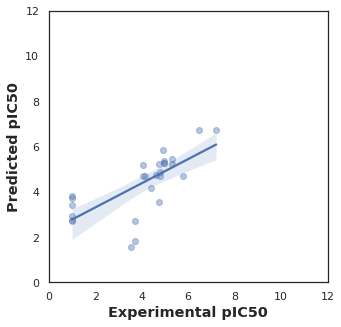

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

With an MSE value of 1.68, this model has moderate performance.

#**Save model as a Pickle object**

Pickle is used in serializing and deserializing a Python object structure. It converts a Python object into a byte stream to store it in a file/database, maintain program state across sessions, or transport data over the network.

In [ ]:
import pickle

In [ ]:
pickle.dump(model, open('sars_cov_proteinase_model.pkl', 'wb'))